<a href="https://colab.research.google.com/github/xoyeon/Dacon-Daily-Python-Camp/blob/main/Lv4_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [1]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2021-09-07 02:39:14--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-09-07 02:39:14--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/egacqgdcqi9097u1bf8emrh6n2e5avd9/1630982325000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-09-07 02:39:15--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/

In [2]:
# 라이브러리 및 데이터 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# VIF기능을 제공하는 라이브러리 불러오기
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn 의 MinMaxScaler 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# PCA 라이브러리 호출
from sklearn.decomposition import PCA

# 데이터를 불러와 학습시킬 준비하기

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.drop('index',axis = 1, inplace = True)
test.drop('index',axis = 1, inplace = True)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 👋 실습
---







## EDA

In [3]:
import seaborn as sns

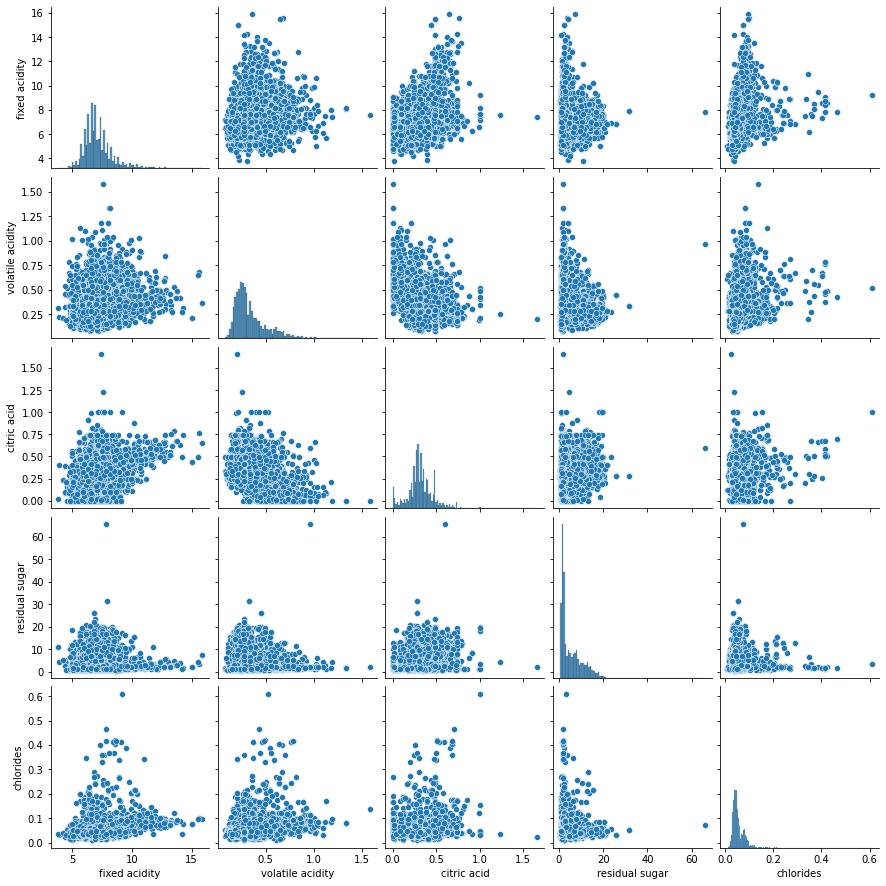

In [4]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요
data = train.loc[:, 'fixed acidity':'chlorides']

# data의 pairplot을 그려보세요
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


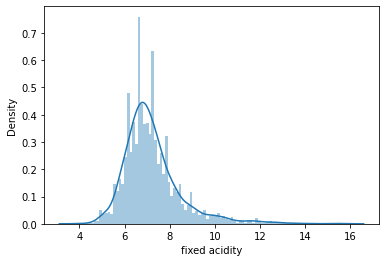

In [5]:
# "data"라는 변수에 train의 "fixed acidity" 변수를 저장해주세요
data = train['fixed acidity']

# data의 distplot을 그려보세요(bins = 100)
sns.distplot(data, bins=100)

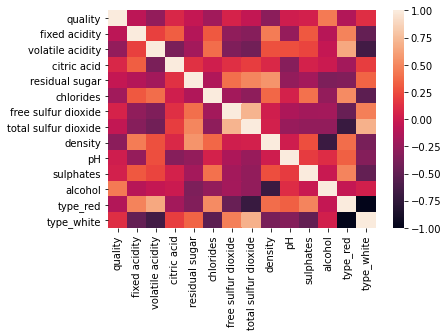

In [6]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )
# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.
data = train.corr()

# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.
sns.heatmap(data)

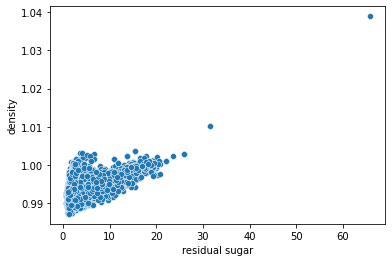

In [7]:
# Scatter Plot을 그릴 변수 지정 (x = residual sugar, y = density)
x_data = train['residual sugar']
y_data = train['density']

# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.
sns.scatterplot(x = x_data, y = y_data)

## 전처리

In [8]:
# train 데이터의 VIF 계수 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif["features"] = train.columns

vif

# MinMaxScaler를 통해 변수 변환 
scaler = MinMaxScaler()
scaler.fit(train)

train_scale = scaler.transform(train)

# Sclaer 를 통해 변환된 데이터의 VIF 확인
new_train_df =  pd.DataFrame(train_scale)
new_train_df.columns = train.columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]
vif["features"] = new_train_df.columns 

vif

,VIF Factor,features
0,1.416009,quality
1,4.858636,fixed acidity
2,2.276390,volatile acidity
3,1.607028,citric acid
4,9.558838,residual sugar
5,1.679595,chlorides
6,2.217950,free sulfur dioxide
7,4.046127,total sulfur dioxide
8,21.790905,density
9,2.504494,pH


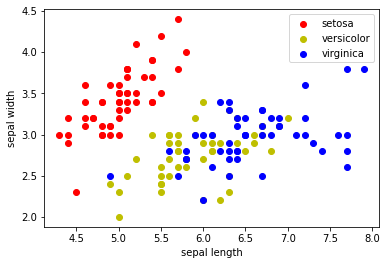

(150, 2)


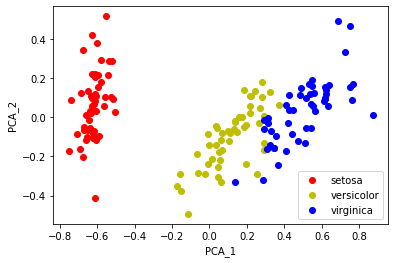

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# 사이킷런 내장 데이터 셋 API 호출

iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns =  ['sepal_length','sepal_width','petal_length','petal_width']
df['target']=iris.target
df.head(3)

#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
  x_axis_data = df[df['target']==i]['sepal_length']
  y_axis_data = df[df['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data,color = c,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환
# 'sepal_length','sepal_width','petal_length','petal_width'
df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

# PCA를 이용하여 4차원 변수를 2차원으로 변환
pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)
df_pca = pca.transform(df_scaler)
print(df_pca.shape)

# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PCA_1','PCA_2']
df_pca['target']=df.target

df_pca.head(3)

#setosa는 빨간색, versicolor는 노란색, virginica는 파란색
color=['r', 'y', 'b']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 
# 각 target 별로 다른 색으로 scatter plot 
for i, c in enumerate(color):
  x_axis_data = df_pca[df_pca['target']==i]['PCA_1']
  y_axis_data = df_pca[df_pca['target']==i]['PCA_2']
  plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')

plt.show()

In [10]:
 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환
train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

In [11]:
from sklearn.preprocessing import PolynomialFeatures


 # train 데이터를 PolynomialFeatures 를 이용하여 변환
 # 차원은 2로 설정
poly_features = PolynomialFeatures(degree=2)


# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.
df = train.drop('quality',axis = 1)
df_poly = poly_features.fit_transform(df)
df_poly = pd.DataFrame(df_poly)


# fit_transform 메소드를 통해 데이터 변환
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(df_poly,train['quality'])

# test 데이터 변환
poly_features = PolynomialFeatures(degree=2)
test_poly = poly_features.fit_transform(test)
test_poly = pd.DataFrame(test_poly)

# 결괏값 추론
pred = model.predict(test_poly)


# 정답 파일 생성
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.to_csv('poly.csv',index = False)

## 모델링 및 튜닝


### Random forest 튜닝

In [36]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'])

y = train['quality']


# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5 .모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):
  #####################################
  rf_params = {

              'max_depth' : int(round(max_depth)),

               'n_estimators' : int(round(n_estimators)),      

              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score
  #####################################




# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요
  BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

  BO_lgbm.maximize(init_points = 5, n_iter = 5)

### xgb 튜닝

In [39]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'])

y = train['quality']



# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {

                      'gamma' : (0,10),

                      'max_depth' : (1,3), # 나무의 깊이

                      'subsample' : (0.5,1)

                      }



# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  #####################################
  xgb_params = {

              'gamma' : int(round(gamma)),

              'max_depth' : int(round(max_depth)),

               'subsample' : int(round(subsample)),      

              }
  xgb = XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  gb.fit(X_train,y_train)

  score = accuracy_score(y_valid, xgb.predict(X_valid))

  return score
  #####################################



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

  BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)


# Bayesian Optimization을 실행해보세요

  BO_xgb.maximize(init_points = 5, n_iter = 5)

### LGBM 튜닝

In [49]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['quality'])

y = train['quality']



# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {

                      'n_estimators' : (30,100),

                      'max_depth' : (1,3), # 나무의 깊이

                      'subsample' : (0.5,1)

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.

# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들

# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성

# 3. 그 딕셔너리를 바탕으로 모델 생성

# 4. train_test_split을 통해 데이터 train-valid 나누기

# 5. 모델 학습

# 6. 모델 성능 측정

# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  #####################################
  lgbm_params = {

              'n_estimators' : int(round(n_estimators)),

              'max_depth' : int(round(max_depth)),

               'subsample' : int(round(subsample)),      

              }
              
  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score
  #####################################



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요
  BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)


# Bayesian Optimization을 실행해보세요
  BO_lgbm.maximize(init_points = 5, n_iter = 5)

### voting classifier 정의 및 예측

In [65]:
# 원핫 인코딩 (pd.get_dummies())
train_one = pd.get_dummies(train)
test_one = pd.get_dummies(test)

# 모델 정의 (튜닝된 파라미터로)
LGBM = LGBMClassifier(max_depth = 2,n_estimators=60, subsample = 0.8229)
XGB = XGBClassifier(gamma =  4.376, max_depth = 3, subsample = 0.9818)
RF = RandomForestClassifier(max_depth = 3, n_estimators = 35)

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

X = train_one.drop('quality',axis= 1)
y = train_one['quality']

In [66]:
# fit 메소드를 이용해 모델 학습
VC.fit(X,y)

# predict 메소드와 test_one 데이터를 이용해 품질 예측
pred = VC.predict(test_one)

# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

submission.to_csv('tune_voting.csv',index=False)

In [67]:
submission.to_csv('tune_voting.csv',index=False)

# 정답

In [ ]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train.loc[:, 'fixed acidity' : 'chlorides']

# data의 pairplot을 그려보세요

sns.pairplot(data)

In [ ]:
# "data"라는 변수에 train의 "fixed acidity"부터 "chlorides"까지의 변수를 저장해주세요

data = train['fixed acidity']

# data의 pairplot을 그려보세요

sns.distplot(data,bins = 100)

In [ ]:
# 히트맵 그래프를 그릴 변수 지정 (train.corr() )

# corr() 함수는 데이터의 변수간의 상관도를 출력하는 함수 입니다.

data = train.corr()



# seaborn 의 heatmap 함수를 이용해 히트맵 그래프를 그립니다.

sns.heatmap(data)

In [ ]:
# Scatter Plot을 그릴 변수 지정 (

x_data = train['residual sugar']

y_data = train['density']



# seaborn 의 scatterplot함수를 이용해 그래프를 그립니다.

sns.scatterplot(x = x_data, y = y_data )

In [ ]:
# train 데이터의 VIF 계수 출력



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

vif["features"] = train.columns 




# MinMaxScaler를 통해 변수 변환 

scaler = MinMaxScaler()

scaler.fit(train) # fit 함수를 이용해  scaler 학습

train_scale = scaler.transform(train)# "scaler"를 통해 train의 수치들을 변환 시키고 train_scale에 저장 해 주세요.





# Sclaer 를 통해 변환된 데이터의 VIF 확인

new_train_df =  pd.DataFrame(train_scale)

new_train_df.columns = train.columns



vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(new_train_df.values, i) for i in range(new_train_df.shape[1])]

vif["features"] = new_train_df.columns 


In [ ]:
#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2. 

# 각 target 별로 다른 색으로 scatter plot 

for i, c in enumerate(color):

    x_axis_data = df[df['target']==i]['sepal_length']

    y_axis_data = df[df['target']==i]['sepal_width']

    plt.scatter(x_axis_data, y_axis_data,color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('sepal length')

plt.ylabel('sepal width')

plt.show()



# Target 값을 제외한 모든 속성 값을 MinMaxScaler를 이용하여 변환

# 'sepal_length','sepal_width','petal_length','petal_width'

df_features = df[['sepal_length','sepal_width','petal_length','petal_width']]

df_scaler = MinMaxScaler().fit_transform(df_features)



# PCA를 이용하여 4차원 변수를 2차원으로 변환



pca = PCA(n_components=2)



#fit( )과 transform( ) 을 호출하여 PCA 변환 / 데이터 반환

pca.fit(df_scaler)

df_pca = pca.transform(df_scaler)

print(df_pca.shape)



# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정



df_pca = pd.DataFrame(df_pca)

df_pca.columns = ['PCA_1','PCA_2']

df_pca['target']=df.target

df_pca.head(3)



#setosa는 빨간색, versicolor는 노란색, virginica는 파란색

color=['r', 'y', 'b']



# setosa의 target 값은 0, versicolor는 1, virginica는 2. 

# 각 target 별로 다른 색으로 scatter plot 

for i, c in enumerate(color):

    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']

    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']

    plt.scatter(x_axis_data, y_axis_data, color = c,label=iris.target_names[i])



plt.legend()

plt.xlabel('PCA_1')

plt.ylabel('PCA_2')

plt.show()

In [ ]:
 # train 데이터의 alcohol 변수를 구간이 5개인 범주형 변수로 변환

 train['alcohol'] = pd.cut(train.alcohol, 5,labels=False)

In [ ]:
 # train 데이터를 PolynomialFeatures 를 이용하여 변환

 

poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



# 와인 품질 기준인 quality 변수를 제외한 나머지 변수를 포함한 데이터 변환.

df = train.drop('quality',axis = 1)

df_poly = poly_features.fit_transform(df) # fit_transform 메소드를 통해 데이터 변환

df_poly = pd.DataFrame(df_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# DecisionTreeClassifier 모델을 변환된 train 데이터로 학습



from sklearn.tree import DecisionTreeClassifier



model = DecisionTreeClassifier()

model.fit(df_poly,train['quality'])



# test 데이터 변환



poly_features = PolynomialFeatures(degree=2) # 차원은 2로 설정



test_poly = poly_features.fit_transform(test) # fit_transform 메소드를 통해 데이터 변환

test_poly = pd.DataFrame(test_poly) # PolynomialFeatures로 변환 된 데이터를 데이터 프레임 형태로 변환



# 결괏값 추론

pred = model.predict(test_poly)



# 정답 파일 생성

submission = pd.read_csv('data/sample_submission.csv')

submission['quality'] = pred

submission.to_csv('poly.csv',index = False)

## 모델링 및 튜닝

In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# 랜덤포레스트의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 랜덤포레스트의 hyperparameter이름이고, value는 탐색할 범위 입니다.

rf_parameter_bounds = {

                      'max_depth' : (1,3), # 나무의 깊이

                      'n_estimators' : (30,100),

                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def rf_bo(max_depth, n_estimators):

  rf_params = {
              'max_depth' : int(round(max_depth)),
               'n_estimators' : int(round(n_estimators)),      
              }

  rf = RandomForestClassifier(**rf_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  rf.fit(X_train,y_train)

  score = accuracy_score(y_valid, rf.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_rf"라는 변수에 Bayesian Optmization을 저장해보세요

BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_rf.maximize(init_points = 5, n_iter = 5)


In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# XGBoost의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 XGBoost hyperparameter이름이고, value는 탐색할 범위 입니다.

xgb_parameter_bounds = {
                      'gamma' : (0,10),
                      'max_depth' : (1,3), 
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.
# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def xgb_bo(gamma,max_depth, subsample):

  xgb_params = {
              'gamma' : int(round(gamma)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

  xgb = XGBClassifier(**xgb_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  xgb.fit(X_train,y_train)
  score = accuracy_score(y_valid, xgb.predict(X_valid))
  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.
# "BO_xgb"라는 변수에 Bayesian Optmization을 저장해보세요

BO_xgb = BayesianOptimization(f = xgb_bo, pbounds = xgb_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_xgb.maximize(init_points = 5, n_iter = 5)

In [ ]:
# X에 학습할 데이터를, y에 목표 변수를 저장해주세요

X = train.drop(columns = ['index', 'quality'])

y = train['quality']



# LGBM의 하이퍼 파라미터의 범위를 dictionary 형태로 지정해주세요

## Key는 LGBM hyperparameter이름이고, value는 탐색할 범위 입니다.

lgbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }



# 함수를 만들어주겠습니다.

# 함수의 구성은 다음과 같습니다.
# 1. 함수에 들어가는 인자 = 위에서 만든 함수의 key값들
# 2. 함수 속 인자를 통해 받아와 새롭게 하이퍼파라미터 딕셔너리 생성
# 3. 그 딕셔너리를 바탕으로 모델 생성
# 4. train_test_split을 통해 데이터 train-valid 나누기
# 5 .모델 학습
# 6. 모델 성능 측정
# 7. 모델의 점수 반환



def lgbm_bo(n_estimators,max_depth, subsample):

  lgbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

  lgbm = LGBMClassifier(**lgbm_params)



  X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )



  lgbm.fit(X_train,y_train)

  score = accuracy_score(y_valid, lgbm.predict(X_valid))

  return score



# 이제 Bayesian Optimization을 사용할 준비가 끝났습니다.

# "BO_lgbm"라는 변수에 Bayesian Optmization을 저장해보세요

BO_lgbm = BayesianOptimization(f = lgbm_bo, pbounds = lgbm_parameter_bounds,random_state = 0)



# Bayesian Optimization을 실행해보세요

BO_lgbm.maximize(init_points = 5, n_iter = 5)

In [ ]:
# 모델 정의 (튜닝된 파라미터로)
LGBM = LGBMClassifier(max_depth = 2,n_estimators=60, subsample = 0.8229)
XGB = XGBClassifier(gamma =  4.376, max_depth = 3, subsample = 0.9818)
RF = RandomForestClassifier(max_depth = 3, n_estimators = 35)

# VotingClassifier 정의
VC = VotingClassifier(estimators=[('rf',RF),('xgb',XGB),('lgbm',LGBM)],voting = 'soft')

X = train_one.drop('quality',axis= 1)
y = train_one['quality']



# fit 메소드를 이용해 모델 학습

VC.fit(X,y)

# predict 메소드와 test_one 데이터를 이용해 품질 예측

pred = VC.predict(test_one)

# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv('data/sample_submission.csv')
submission['quality'] = pred
submission.head()

submission.to_csv('tune_voting.csv',index=False)

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)